# Chapter 03 - Classification

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

MNIST is a dataset containing 70,000 handwritten digits with their respective labels.

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [6]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
print("The X shape is: {}".format(X.shape))
print("The y shape is: {}".format(y.shape))

The X shape is: (70000, 784)
The y shape is: (70000,)


The images contain 784 features, due to having a dimension of 28 × 28 pixels, where each pixel can have a value between 0 (white) and 255 (black). To view these images, we need to resize them to a dimension of 28×28, and use the `imshow()` function:

The correspondent label of this digit is 5


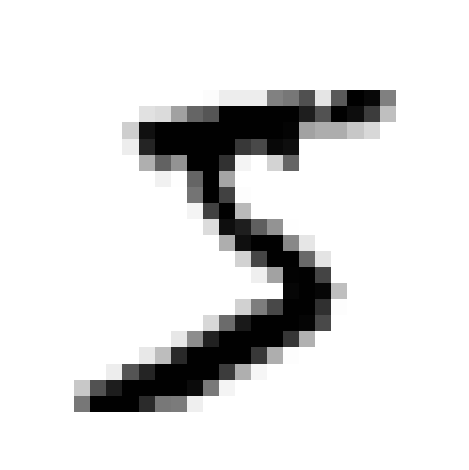

In [10]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
print("The correspondent label of this digit is {}".format(y[0]))
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

A way to visualize multiple images of digits in a 10×10 dimension:

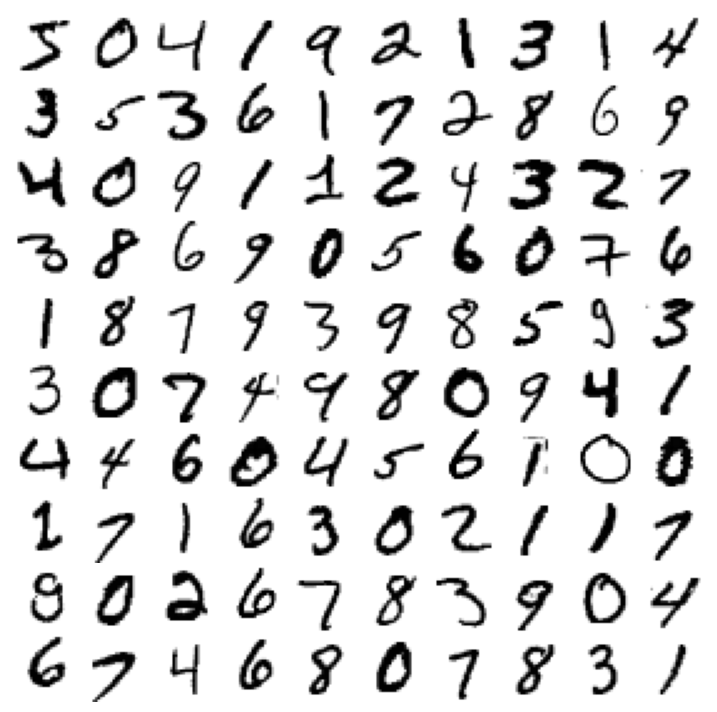

In [12]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

So, it is necessary to separate into training and testing sets. In this data set, the values ​​are already shuffled.

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#  Training a Binary Classifier

A binary classifier, in essence, distinguishes whether it is a value or not a value. Using as an example the construction of a binary classifier for the digit 5, or "5-Detector":

In [17]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

A good starting choice for a classifier is to use a _Stochastic Gradient Descent_ Classifier, or SGD via the `SGDClassifier` class. This handles instances one at a time independently. We can see that the prediction was made correctly, getting the number 5 right:

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


some_digit = X[0] # The label is 5

sgd_clf.predict([some_digit]) 

array([ True])

# Performance Measurement

## Measuring Accuracy Using Cross-Validation


One way to evaluate this is to use _Cross-Validation_, as presented in Chapter 2. In this case, we will use a k-fold of 3 folds (Remember that this operates as dividing the training set into k folds, training the model k times and each time using a fold to be the validation set). Using the code below we can achieve around 95% accuracy.

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

The result is not as good as it seems. One way to check this is with the _Dummy Classifier_, which operates only by classifying images as the most common class, which in this case is negative. We see a very close accuracy, given that having 10 well-distributed digits, about 10% are 5.

In [25]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

## Confusion Matrices

A _Confusion Matrix_ elucidates how many values were computed correctly and how many were computed falsely, assigning values of True Positives, False Positives (negative values identified as positive, or _Type I Error_), False Negatives (positive values identified as negative, or _Type II Error_) and True Negatives.

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In confusion matrices, the main diagonals represent the true values. In the case of the matrix above, the first row, we have respectively the value _True False_ (_TF_) on the left and _False Positive_ (_FP_) on the right. In the second row, on the left we have the value _False Negative_ (_FN_) and on the right the _True Positive_ (_TP_). A perfect matrix has only its main diagonal with values other than zero.

<div class="block-language-tx"><table>
<thead>
	<tr>
		<th style="text-align:center" colspan="2">Confusion Matrix</th>
	</tr>
</thead>
	
<tbody>
	<tr>
		<td>
			<b>True Negative</b>
		</td>
		<td>
			<b>False Positive</b>
		</td>	
	</tr>
</tbody>

<tbody>
	<tr>
		<td>
			<b>False Negative</b>
		</td>
		<td>
			<b>True Positive</b>
		</td>
	</tr>
</tbody>

</table>
</div>


In [31]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Some important information coming from the confusion matrix are:


- **Precision** more important: In the case of detecting safe videos for children, it is preferable to reject videos that are safe (Low Recall), but keep the safe videos (High Precision).

  
$$
Precison = \frac{TP}{TP + FP}
$$


      
- **Recall** more important: When training something to detect shoplifters, it is preferable to have a higher false alarm rate (Low Precision), but to detect almost all cases where a shoplifting occurred (High Recall).

$$
Recall = \frac{TP}{TP + FN}
$$

## Precision and Recall

In [34]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)
rec = recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)


print("The precision value is: {}%. That means that all of claims of find the number 5, only {}% is correct.".format(round(prec*100,2),round(prec*100,2)))
print("The recall value is: {}%. That means that only {}% of the 5s are detected.".format(round(rec*100,2),round(rec*100,2)))

The precision value is: 83.71%. That means that all of claims of find the number 5, only 83.71% is correct.
The recall value is: 65.12%. That means that only 65.12% of the 5s are detected.


A useful metric that combines _Precision_ and _Recall_ is the _$F_{1}$ Score_, where a harmonic average of the results is made prioritizing smaller values, giving importance to both _Precision_ and _Recall_ values. It is worth noting that this is useful in moments where **both Recall and Precision are equally important**.

$$
  F_{1} = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 \times \frac{Precision \times Recall}{Precision + Recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

## The Precision/Recall Trade-off

Precision/Recall Trade-off consists of the possible choice of sacrificing _Precision_ in order to obtain more _Recall_ and vice versa. It operates through a _Decision Function_ for a selected instance when compared with the _Treshold_, when it is greater than this it is classified as positive, and when it is smaller as negative.

- **Increasing** the _Treshold_ **Increases the Precision** and **Decreases the Recall**.
- **Decreasing** the _Treshold_ **Increases the Recall** and **Decreases the Precision**.

It is not possible to change the _Threshold_ through functions, but it is possible to see it through the `decision_function` method and change the minimum/maximum score:

In [42]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [43]:
threshold_1 = 0
y_some_digit_pred_1 = (y_scores > threshold_1)
print(y_some_digit_pred_1)

threshold_2 = 3000
y_some_digit_pred_2 = (y_scores > threshold_2)
print(y_some_digit_pred_2)

[ True]
[False]


It is possible to observe that when we increase the _Threshold_, we reduce the _Recall_.

In [45]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print("Precision: {}".format(precisions))
print("Recall: {}".format(recalls))
print("Threshold: {}".format(thresholds))

Precision: [0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ]
Recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
Threshold: [-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]


You can view _Precision_ and _Recall_ using the scores for each _Threshold_:

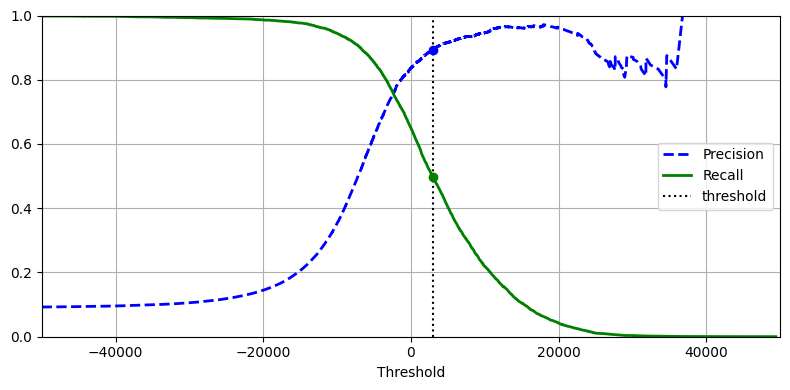

Precision with threshold >= 3000: 0.8911317008603574
Recall with threshold >= 3000: 0.4967718133185759


In [47]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold_2, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold_2).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo") # blue dot
plt.plot(thresholds[idx], recalls[idx], "go") # green dot
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()


print("Precision with threshold >= {}: {}".format(threshold_2, precisions[idx]))
print("Recall with threshold >= {}: {}".format(threshold_2, recalls[idx]))

Another way to observe the behavior of _Thershold_ is from the _Precision_ × _Recall_ curves:

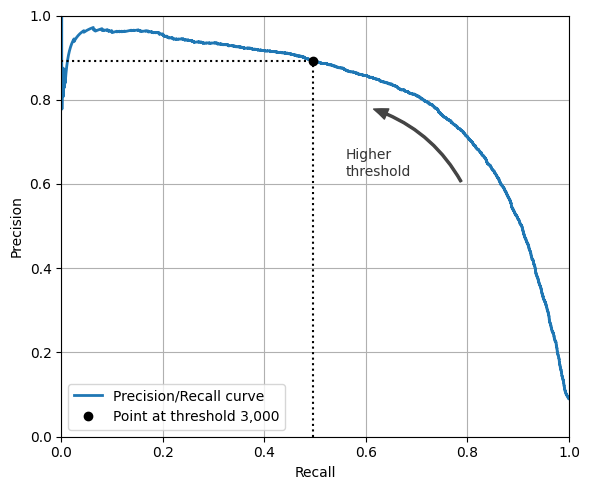

In [49]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:") # vertical dotted line
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:") # horizontal dotted line
plt.plot([recalls[idx]], [precisions[idx]], "ko", label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch((0.79, 0.60), (0.61, 0.78), connectionstyle="arc3,rad=.2", 
                                            arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10", color="#444444")) # print arrow
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333") # Print text in graph
plt.xlabel("Recall") # x Label
plt.ylabel("Precision") # y Label
plt.axis([0, 1, 0, 1]) # Axis limits
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

An alternative way to define a _Precision_ or _Recall_ is using the `argmax()` method:

In [51]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

y_train_pred_90 = (y_scores >= threshold_for_90_precision)

precision_at_90_precision = precision_score(y_train_5, y_train_pred_90)
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

print("Values at 90 Precision:")
print("Precision: {}".format(precision_at_90_precision))
print("Recall: {}".format(recall_at_90_precision))
print("Threshold: {}".format(threshold_for_90_precision))

Values at 90 Precision:
Precision: 0.9000345901072293
Recall: 0.4799852425751706
Threshold: 3370.0194991439557


## The ROC Curve

_Receiver Operating Characteristic_ (ROC) curve plot the _True Positive Rate_ (TPR, _Sensitivity_ or _Recall_) × _False Positive Rate_ (FPR, or _Fallout_).

The FPR can be read also like the _Ratio of negative instances that are incorrectly classified as positive_. Can be also written as $FPR = 1 - TNR$, that is the _True Negative Ratio_, or _Specificity_. 

So, the ROC curve is _Sensitivity_ × (1 - _Specificity_).

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Below is a graph of the ROC curve with 90% accuracy as the parameter. Is important to observe the dotted line, reprenting the behavior of a ROC Curve of a Random Classifier. A good Classifier must be as far from that line as possible.

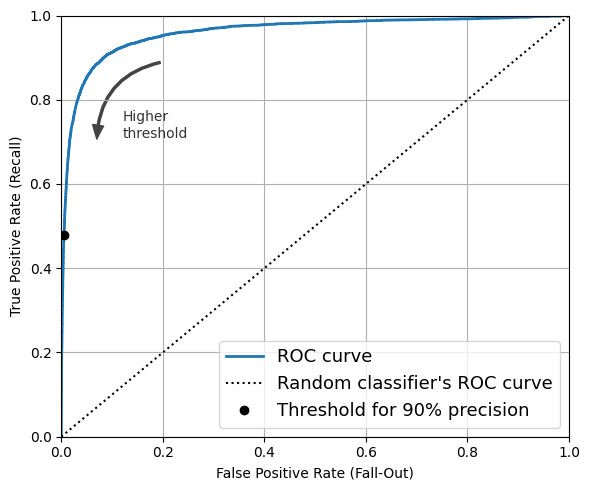

In [54]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# ROC Curve
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch((0.20, 0.89), (0.07, 0.70), connectionstyle="arc3,rad=.4",
                                            arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10", color="#444444")) # arrow
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333") # text
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

For this curve theres another trade-off: **↑ TPR, ↓ FPR**.


<div class="alert alert-block alert-info">
<b>Note: How to know when use Precision × Recall (PR) or ROC Curve?</b>


 Use the PR curve when: Positive class is rare, OR when you care about False Positives more than False Negatives.

 In other cases, use ROC.
</div>

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616